In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.0,0.0,18.733,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.0,0.0,37.465,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-24,12.0,8.0,0.0,0.0,112.395,74.930,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-25,17.0,5.0,0.0,0.0,159.227,46.831,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-26,19.0,2.0,0.0,0.0,177.959,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [4]:
import datetime

twoweeksago = datetime.date.today() - datetime.timedelta(days=14)

In [5]:
pd.set_option('mode.chained_assignment', None)

#eu = df.loc[df['continent'] == 'Europe']
df['date'] = pd.to_datetime(df['date'])

df = df.loc[df['date'] >= pd.to_datetime(twoweeksago)]

df['pr_100k'] = df['new_cases']*100000/df['population']

df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,pr_100k
121,ABW,North America,Aruba,2020-07-22,117.0,2.0,3.0,0.0,1095.854,18.733,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,1.873256
122,ABW,North America,Aruba,2020-07-23,117.0,0.0,3.0,0.0,1095.854,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,0.000000
123,ABW,North America,Aruba,2020-07-24,117.0,0.0,3.0,0.0,1095.854,0.000,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,0.000000
124,ABW,North America,Aruba,2020-07-25,118.0,1.0,3.0,0.0,1105.221,9.366,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,0.936628
125,ABW,North America,Aruba,2020-07-26,119.0,1.0,3.0,0.0,1114.587,9.366,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,0.936628


In [6]:
last_two_weeks_tot = df.groupby('iso_code')['pr_100k'].sum().reset_index()

last_two_weeks_tot

,iso_code,pr_100k
0,ABW,8.429650
1,AFG,2.907907
2,AGO,1.262693
3,AIA,0.000000
4,ALB,50.350963
...,...,...
206,VNM,0.286628
207,YEM,0.398981
208,ZAF,241.505924
209,ZMB,17.700216


In [7]:
print('Enter desired country')
iso = input()

Enter desired country


In [8]:
last_two_weeks_tests = df.groupby('iso_code')['new_cases'].sum() / df.groupby('iso_code')['new_tests'].sum()

last_two_weeks_tests = last_two_weeks_tests.replace([np.inf, -np.inf], np.nan)

last_two_weeks_tests.dropna(inplace=True)

try:
    tests = last_two_weeks_tests.loc[iso]
except KeyError as e:
    print('No data available for tests')
    tests = 0

No data available for tests


In [10]:
answer = last_two_weeks_tot.loc[last_two_weeks_tot['iso_code'] == iso]['pr_100k']

print('FHIs calculation for the last two weeks is based on {} cases. Amount positive tests: {}'.format(answer.iloc[0], tests))
if answer.iloc[0] < 20 & tests < 5:
    print('So far so good!')
else:
    print("Let's hope for the best :-)")
    

FHIs calculation for the last two weeks is based on 13.357704484192812 cases. Amount positive tests: 0
Let's hope for the best :-)


(array([18466., 18468., 18470., 18472., 18474., 18475., 18477.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

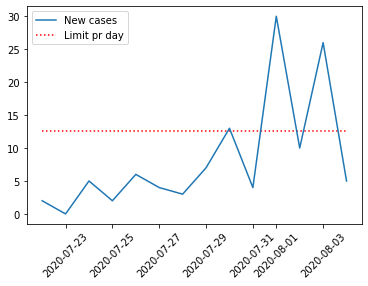

In [11]:
import matplotlib.pyplot as plt

ctry = df.loc[df['iso_code'] == iso]

max_per_day = 20 * ctry['population'].iloc[0] / 100000 / 14

plt.plot(ctry['date'], ctry['new_cases'], label='New cases')
plt.hlines(max_per_day, ctry['date'].min(), ctry['date'].max(), linestyles='dotted', colors='red', label='Limit pr day')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

In [12]:
ctry

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,pr_100k
7868,CYP,Europe,Cyprus,2020-07-22,1040.0,2.0,19.0,0.0,1187.352,2.283,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.228337
7869,CYP,Europe,Cyprus,2020-07-23,1040.0,0.0,19.0,0.0,1187.352,0.000,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.000000
7870,CYP,Europe,Cyprus,2020-07-24,1045.0,5.0,19.0,0.0,1193.060,5.708,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.570842
7871,CYP,Europe,Cyprus,2020-07-25,1047.0,2.0,19.0,0.0,1195.343,2.283,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.228337
7872,CYP,Europe,Cyprus,2020-07-26,1053.0,6.0,19.0,0.0,1202.193,6.850,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.685010
7873,CYP,Europe,Cyprus,2020-07-27,1057.0,4.0,19.0,0.0,1206.760,4.567,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.456674
7874,CYP,Europe,Cyprus,2020-07-28,1060.0,3.0,19.0,0.0,1210.185,3.425,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.342505
7875,CYP,Europe,Cyprus,2020-07-29,1067.0,7.0,19.0,0.0,1218.177,7.992,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.799179
7876,CYP,Europe,Cyprus,2020-07-30,1080.0,13.0,19.0,0.0,1233.019,14.842,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,1.484189
7877,CYP,Europe,Cyprus,2020-07-31,1084.0,4.0,19.0,0.0,1237.586,4.567,...,32415.132,NaN,141.171,9.24,19.6,52.7,NaN,3.4,80.98,0.456674
